<a href="https://colab.research.google.com/github/grjadhav409/Enthalpy-prediction-ML/blob/main/6_model_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#df = raw data
#df1 = smiles
#df3 = merging smiles and df
# df4 = drop duplicate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# loading data

In [ ]:
alkane = "/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/alkanes.xlsx"
alkene="/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/alkene.xlsx"
alkyne="/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/alkyne.xlsx"
diene="/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/diene.xlsx"
RCH3="/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/RCH3.xlsx"
R4C="/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/R4C.xlsx"
R3CH="/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/R3CH.xlsx"
R2CH2="/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/R2CH2.xlsx"

In [ ]:
df1 = pd.read_excel(alkane)
df2 = pd.read_excel(alkene)
df3 = pd.read_excel(alkyne)
df4 = pd.read_excel(diene)
df5 = pd.read_excel(RCH3)
df6 = pd.read_excel(R4C)
df7 = pd.read_excel(R3CH)
df8 = pd.read_excel(R2CH2)

In [ ]:
df= pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df = df.drop(["species1","species2","species3",'species4',"hfg_0K"],axis=1)
df

,name,charge,species,hfg
0,Decane,0,C10H22,-249.70
1,Nonane,0,C9H20,-228.30
2,tetramethylbutane,0,(CH3)3CC(CH3)3,-226.20
3,Octane,0,C8H18,-208.40
4,2-methylhexane,0,C7H16,-195.00
...,...,...,...,...
252,Bicyclo[2.2.0]hex-1(4)-ene,0,C6H8,303.76
253,Bicyclo[1.1.0]butane-1-carbonitrile,0,C5H5N,304.51
254,Bicyclo[2.1.0]pent-2-ene,0,C5H6,333.05
255,Quadricyclane,0,C7H8,336.00


# Exploratory data analysis

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

name       0
charge     0
species    0
hfg        0
dtype: int64

# Calculating pubchem smiles 
*df4

In [ ]:
!pip install pubchempy
from pubchempy import get_compounds
import pandas as pd
 

  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=4ab4bb3ce0bf97389017f74f5e490df6bd0cc167b31bf7eba4eecc7a4db25e5b
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy


In [ ]:
#pubchem smiles calculation

"""
name= df['name'].tolist()
data= []
for x in name:
  #print(x)
  for compound in get_compounds (x,"name"):
    #print(compound.cid)
    #print(compound.isomeric_smiles)
    data.append([x,compound.cid,compound.isomeric_smiles])
#print(cid)
df1 = pd.DataFrame(data, columns=["name","cid","isomeric_smiles"])
print(df1)

"""

'\nname= df[\'name\'].tolist()\ndata= []\nfor x in name:\n  #print(x)\n  for compound in get_compounds (x,"name"):\n    #print(compound.cid)\n    #print(compound.isomeric_smiles)\n    data.append([x,compound.cid,compound.isomeric_smiles])\n#print(cid)\ndf1 = pd.DataFrame(data, columns=["name","cid","isomeric_smiles"])\nprint(df1)\n\n'

In [ ]:
#df3 = pd.merge(df1, df, on='name')
#df3
#merged smiles with df

In [ ]:
#df3.to_excel(r"/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/df_enthalpy_HC_smiles.xlsx", sheet_name='df_enthalpy_HC_smiles.xlsx', index = False)

In [ ]:
df3 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data2/Enthalpy of formation enthalpy of formation/hydrocarbans/df_enthalpy_HC_smiles.xlsx")

In [ ]:
df3

,name,cid,isomeric_smiles,charge,species,hfg
0,Decane,15600,CCCCCCCCCC,0,C10H22,-249.70
1,Decane,15600,CCCCCCCCCC,0,C10H22,-249.70
2,Decane,15600,CCCCCCCCCC,0,C10H22,-249.70
3,Decane,15600,CCCCCCCCCC,0,C10H22,-249.70
4,Decane,15600,CCCCCCCCCC,0,C10H22,-249.70
...,...,...,...,...,...,...
1851,Diiodomethane,6346,C(I)I,0,CH2I2,118.00
1852,Aziridine,9033,C1CN1,0,C2H5N,126.00
1853,Cyclobutanecarbonitrile,78148,C1CC(C1)C#N,0,C5H7N,147.30
1854,Fluorene,6853,C1C2=CC=CC=C2C3=CC=CC=C31,0,C13H10,176.70


In [ ]:
df4 = df3.drop_duplicates()
df4

,name,cid,isomeric_smiles,charge,species,hfg
0,Decane,15600,CCCCCCCCCC,0,C10H22,-249.70
9,Nonane,8141,CCCCCCCCC,0,C9H20,-228.30
18,tetramethylbutane,11675,CC(C)(C)C(C)(C)C,0,(CH3)3CC(CH3)3,-226.20
27,Octane,356,CCCCCCCC,0,C8H18,-208.40
36,2-methylhexane,11582,CCCCC(C)C,0,C7H16,-195.00
...,...,...,...,...,...,...
1851,Diiodomethane,6346,C(I)I,0,CH2I2,118.00
1852,Aziridine,9033,C1CN1,0,C2H5N,126.00
1853,Cyclobutanecarbonitrile,78148,C1CC(C1)C#N,0,C5H7N,147.30
1854,Fluorene,6853,C1C2=CC=CC=C2C3=CC=CC=C31,0,C13H10,176.70


In [ ]:
df4.isnull().sum()

name               0
cid                0
isomeric_smiles    0
charge             0
species            0
hfg                0
dtype: int64

# fingerprint calculation

* df4_X = fingerprints with name column
*df4_Y = hfg values

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2022-02-17 08:11:03--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-02-17 08:11:03--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-02-17 08:11:04 (221 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-02-17 08:11:05--  https://github

In [ ]:
selection = ['isomeric_smiles','cid']
df4_selection = df4[selection]
df4_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CCCCCCCCCC	15600
CCCCCCCCC	8141
CC(C)(C)C(C)(C)C	11675
CCCCCCCC	356
CCCCC(C)C	11582


In [ ]:
! cat molecule.smi | wc -l

408


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing 15600 in molecule.smi (1/408). 
Processing 8141 in molecule.smi (2/408). 
Processing 356 in molecule.smi (4/408). Average speed: 0.81 s/mol.
Processing 11675 in molecule.smi (3/408). Average speed: 1.62 s/mol.
Processing 11582 in molecule.smi (5/408). Average speed: 0.64 s/mol.
Processing 11507 in molecule.smi (6/408). Average speed: 0.50 s/mol.
Processing 8900 in molecule.smi (7/408). Average speed: 0.44 s/mol.
Processing 6403 in molecule.smi (8/408). Average speed: 0.38 s/mol.
Processing 6589 in molecule.smi (9/408). Average speed: 0.34 s/mol.
Processing 7282 in molecule.smi (11/408). Average speed: 0.29 s/mol.
Processing 7892 in molecule.smi (10/408). Average speed: 0.31 s/mol.
Processing 10041 in molecule.smi (12/408). Average speed: 0.27 s/mol.
Processing 8058 in molecule.smi (13/408). Average speed: 0.26 s/mol.
Processing 6556 in molecule.smi (14/408). Average speed: 0.25 s/mol.
Processing 8003 in molecule.smi (15/408). Average speed: 0.24 s/mol.
Processing 6360 in mol

In [ ]:
! ls -l

total 25916
-rw-r--r-- 1 root root   733413 Feb 17 08:11 descriptors_output.csv
drwx------ 5 root root     4096 Feb 17 08:10 drive
drwxr-xr-x 3 root root     4096 Feb 17 08:11 __MACOSX
-rw-r--r-- 1 root root     6322 Feb 17 08:11 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Feb 17 08:11 padel.sh
-rw-r--r-- 1 root root 25768637 Feb 17 08:11 padel.zip
drwxr-xr-x 1 root root     4096 Feb  1 14:32 sample_data


In [ ]:
df4_X = pd.read_csv('/content/descriptors_output.csv')
df4_X.drop('Name', axis=1, inplace=True) 

In [ ]:
df4_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
404,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
405,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
406,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4_Y = df4.hfg
df4_Y

0      -249.70
9      -228.30
18     -226.20
27     -208.40
36     -195.00
         ...  
1851    118.00
1852    126.00
1853    147.30
1854    176.70
1855    209.66
Name: hfg, Length: 408, dtype: float64

# Model 

## train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df4_X_train, df4_X_test, df4_Y_train, df4_Y_test = train_test_split(df4_X, df4_Y, test_size=0.2)

In [ ]:
df4_X.shape

(408, 881)

In [ ]:
df4_Y.shape

(408,)

## Feature selection

In [ ]:
df4_Y_train.reset_index(drop=True, inplace=True)
df4_X_train.reset_index(drop=True, inplace=True)

train_data = pd.concat( [df4_X_train, df4_Y_train], axis=1) 
train_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,hfg
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-150.50
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-217.10
2,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-301.33
3,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-102.17
4,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-96.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-387.50
322,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-29.29
323,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-53.68
324,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,171.96


In [ ]:
"""
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()
"""

'\nplt.figure(figsize = (18,18))\nsns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")\nplt.show()\n'

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(df4_X_train, df4_Y_train)


ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)


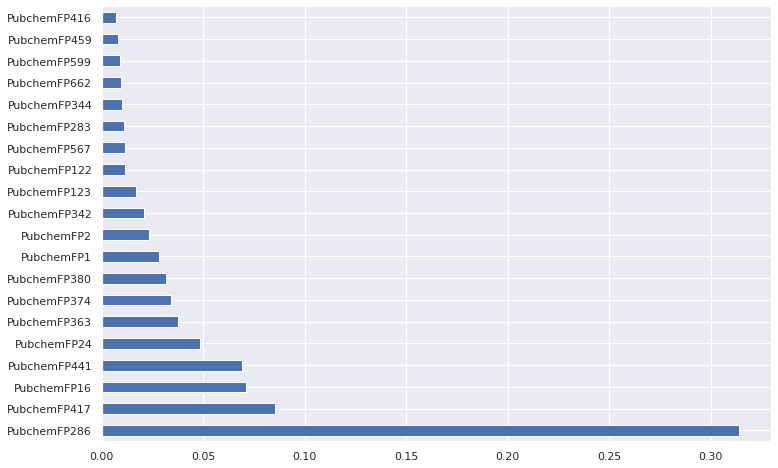

In [ ]:
# plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=df4_X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## linear regression 

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(df4_X_train, df4_Y_train)
Y_pred = model.predict(df4_X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(df4_Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(df4_Y_test, Y_pred))

## flamMl autoML

In [ ]:
!pip install flaml
from flaml import AutoML

     |████████████████████████████████| 143 kB 11.4 MB/s 
     |████████████████████████████████| 2.0 MB 47.6 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
#from sklearn.datasets import load_boston

automl = AutoML()

automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'r2',
    "task": 'regression'
}
#X_train, y_train = load_boston(return_X_y=True)
# Train with labeled input data
automl.fit(df4_X_train, df4_Y_train,
           **automl_settings)
# Predict
print(automl.predict(df4_X_train).shape)
# Export the best model
print(automl.model)

In [ ]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 12, 'num_leaves': 8, 'min_child_samples': 5, 'learning_rate': 0.22524994995743033, 'log_max_bin': 7, 'colsample_bytree': 0.6929232362522451, 'reg_alpha': 0.006958608037974516, 'reg_lambda': 0.0026022831012420906}
Best accuracy on validation data: 0.497
Training duration of best run: 0.04535 s


## random forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4_X, df4_Y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)


0.9333553544506488

In [ ]:
reg_rf.score(X_test, y_test)


0.6439992653580665

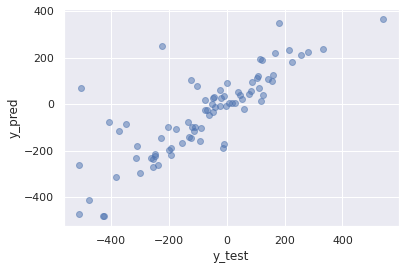

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 75.67435688637244
MSE: 15308.80755417551
RMSE: 123.7287660739228


In [ ]:
metrics.r2_score(y_test, y_pred)


0.6439992653580665

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)


In [ ]:
rf_random.best_params_


{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

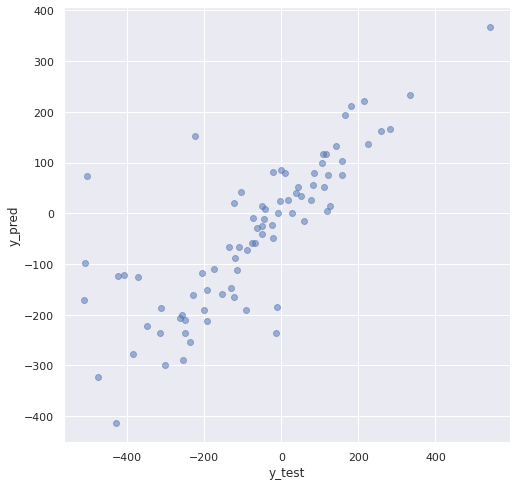

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 81.29553719927695
MSE: 17100.616682960714
RMSE: 130.76932623119504


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [ ]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)


In [ ]:
metrics.r2_score(y_test, y_prediction)

0.6023313977643119